# Deep learning -  Opdracht sessie 02 - CNN

## Doelstelling van de opdracht

Op het vlak van image recognition zijn de convolutional neural networks (en varianten ervan) nagenoeg onovertroffen.
In deze opdracht zullen ze worden ingezet voor het herkennen van kledij, gezichtsexpressies en tot slot bij een autodetectiesysteem. Bij het uitvoeren ervan zal je leren hoe deze CNN's werken en welke hyperparameters getuned moeten worden. Bovendien zal je werken met kleurafbeeldingen waardoor je 4D tensors bekomt (3D afbeeldingen + 1 dimensie voor alle gestackte afbeeldingen).
Naast het trainen van een eigen ontworpen CNN zal je ook gebruik maken van pretrained netwerken en deze via transfer learning deels hertrainen in functie van jouw eigen classificatieprobleem.

Het laatste deel van de opdracht is het testen van een state-of-the art detectiesysteem, YOLO genaamd.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

from skimage.io import imread, imshow
import matplotlib.image as mpimg
from skimage import data, color, io, filters, morphology,transform, exposure, feature
from scipy import ndimage
import skimage
from skimage.io import imread, imshow
from skimage.draw import rectangle

from keras import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.utils import np_utils

Using TensorFlow backend.


## Zalando via CNN

Fashion-MNIST is een dataset van Zalando bestaande uit afbeeldingen van kledij. De training set ('fashion-mnist_train.csv') bestaat uit 60000 afbeeldingen, de test set ('fashion-mnist_test.csv') uit 10000 afbeeldingen. Elke grijsafbeelding is 28x28 pixels groot en is toegewezen aan één van de 10 klasses:

0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'.

- Train een eigen ontworpen CNN dat een zo hoog mogelijke accuracy score behaalt op de test set.
- Gebruik het pretrained VGG19 net en pas transfer learning toe voor het herkennen van de gezichtsexpressies. Hoe presteert het in vergelijking met het zelf ontworpen CNN?

Vergelijk jouw eigen accuracy score met deze opgelijst op https://github.com/zalandoresearch/fashion-mnist.


In [3]:
# Inlezen fashion MNIST dataset

df_train = pd.read_csv('./fashion-mnist_train.csv')
df_test = pd.read_csv('./fashion-mnist_test.csv')
df_train.head()

# Splitsen in features and targets

train_labels = df_train.label.values
test_labels = df_test.label.values
y_train = np_utils.to_categorical(train_labels)
y_test = test_labels
X_train = df_train.drop("label",axis=1).values



#wat doet deze code?! 
X_train = X_train.reshape((len(X_train),28, 28,1))


X_test  = df_test.drop("label",axis=1).values
X_test = X_test.reshape((len(X_test),28, 28,1)) 

# Normalisatie
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255



In [4]:
# Uitwerking van de opgave Zalando via CNN

# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 32 # 
epochs = 100 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)
#1 is hoeveel channels je data heeft (1 bij grijs, 3 bij kleur)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

# Trainen van het CNN
history = model.fit(X_train, y_train,batch_size=batch_size, epochs=epochs,  verbose=1)
print(history)





Epoch 1/100
60000/60000 [==============================] - 16s 259us/step - loss: 0.5759 - acc: 0.7878
Epoch 2/100
60000/60000 [==============================] - 13s 218us/step - loss: 0.4124 - acc: 0.8488
Epoch 3/100
60000/60000 [==============================] - 13s 216us/step - loss: 0.3741 - acc: 0.8630
Epoch 4/100
60000/60000 [==============================] - 13s 217us/step - loss: 0.3463 - acc: 0.8715
Epoch 5/100
60000/60000 [==============================] - 13s 214us/step - loss: 0.3325 - acc: 0.8763
Epoch 6/100
60000/60000 [==============================] - 13s 214us/step - loss: 0.3242 - acc: 0.8797
Epoch 7/100
60000/60000 [==============================] - 13s 211us/step - loss: 0.3154 - acc: 0.8837
Epoch 8/100
60000/60000 [==============================] - 13s 214us/step - loss: 0.3083 - acc: 0.8855
Epoch 9/100
60000/60000 [==============================] - 13s 213us/step - loss: 0.3048 - acc: 0.8876
Epoch 10/100
60000/60000 [==============================] - 13s 210us/ste

In [5]:
#predicten met het model 

y_pred = model.predict_classes(X_test)
print('\n')
print('accuracy score:', accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)



accuracy score: 90.85


              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1000
           1       0.99      0.99      0.99      1000
           2       0.95      0.72      0.82      1000
           3       0.92      0.95      0.93      1000
           4       0.80      0.92      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.69      0.85      0.76      1000
           7       0.94      0.98      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.95      0.97      1000

   micro avg       0.91      0.91      0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

[[774   1   7  24   2   0 188   1   3   0]
 [  0 988   1   6   1   1   2   0   1   0]
 [  9   1 716   8 155   0 111   0   0   0]
 [  8   3   2 946  21   0  20   0   0   0]
 [  0   0   3  23 918   0  55   0   1   0]


In [5]:
#grid search CNN Zalando

def create_model(optimizer='adam',activation = 'relu',dropout_rate = 0.0,neurons = 10):
    
    num_classes = 10
    img_rows, img_cols = 28, 28
    input_shape = (img_rows, img_cols, 1)
    
    
    
    model = Sequential()
    #-----------------------------------------------
    #-----------------------------------------------
    model.add(Conv2D(neurons, kernel_size=(3, 3), activation=activation,input_shape=input_shape)) 
    #-----------------------------------------------
    #-----------------------------------------------
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #-----------------------------------------------
    #-----------------------------------------------
    model.add(Dropout(dropout_rate)) # Value between 0 and 1 
    #-----------------------------------------------
    model.add(BatchNormalization())
    #-----------------------------------------------
    model.add(Conv2D(neurons, (3, 3), activation=activation)) 
    #-----------------------------------------------
    #-----------------------------------------------
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #-----------------------------------------------
    #-----------------------------------------------
    model.add(Dropout(dropout_rate)) # Value between 0 and 1 
    #-----------------------------------------------
    model.add(BatchNormalization())
    #-----------------------------------------------
    #-----------------------------------------------
    model.add(Flatten()) 
    model.add(Dense(50, activation=activation)) 
    #-----------------------------------------------
    #-----------------------------------------------
    model.add(Dropout(dropout_rate)) # Value between 0 and 1 
    #-----------------------------------------------
    #-----------------------------------------------
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    
    
    return model



    
model = KerasClassifier(build_fn=create_model, batch_size=8, epochs =10)

activation =  ['relu', 'tanh', 'sigmoid'] 
dropout_rate = [0.0, 0.1, 0.5]
neurons = [5, 10, 20, 30, 40 ,50]
optimizer = [ 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
epochs = [100]
batch_size = [8, 16, 32] 

param_grid = dict(epochs=epochs, batch_size=batch_size,optimizer = optimizer, dropout_rate = dropout_rate,activation = activation)
##############################################################
grid = GridSearchCV(estimator=model, param_grid = param_grid,verbose=3)
grid_result = grid.fit(X_train, y_train) 

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 189 candidates, totalling 567 fits
[CV] activation=relu, batch_size=8, dropout_rate=0.0, epochs=100, optimizer=SGD 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/100
40000/40000 [==============================] - 21s 525us/step - loss: 0.5342 - acc: 0.8039
Epoch 2/100
40000/40000 [==============================] - ETA: 0s - loss: 0.3928 - acc: 0.856 - 21s 517us/step - loss: 0.3927 - acc: 0.8561
Epoch 3/100
40000/40000 [==============================] - 20s 505us/step - loss: 0.3533 - acc: 0.8704
Epoch 4/100
40000/40000 [==============================] - 20s 500us/step - loss: 0.3303 - acc: 0.8785
Epoch 5/100
40000/40000 [==============================] - 20s 502us/step - loss: 0.3108 - acc: 0.8842
Epoch 6/100
40000/40000 [==============================] - ETA: 0s - loss: 0.2979 - acc: 0.887 - 20s 501us/step - loss: 0.2979 - acc: 0.8873
Epoch 7/100
40000/40000 [==============================] - 20s 502us/step - loss: 0.2844 - acc: 0.8950
Epoch 8/100
40000/40000 [==============================] - 20s 509us/step - loss: 0.2764 - acc: 0.8976
Epoch 9/100
40000/40000 [==============================] - 20s 508us/step - loss: 0.2700 - acc: 0.89

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 34.9min remaining:    0.0s


Epoch 1/100
40000/40000 [==============================] - 23s 574us/step - loss: 0.5079 - acc: 0.8149
Epoch 2/100
40000/40000 [==============================] - 22s 555us/step - loss: 0.3721 - acc: 0.8628
Epoch 3/100
40000/40000 [==============================] - 22s 554us/step - loss: 0.3352 - acc: 0.8776
Epoch 4/100
40000/40000 [==============================] - 22s 550us/step - loss: 0.3134 - acc: 0.8847
Epoch 5/100
40000/40000 [==============================] - 23s 566us/step - loss: 0.2959 - acc: 0.8917
Epoch 6/100
40000/40000 [==============================] - 22s 543us/step - loss: 0.2843 - acc: 0.8954
Epoch 7/100
40000/40000 [==============================] - 23s 584us/step - loss: 0.2700 - acc: 0.9011
Epoch 8/100
40000/40000 [==============================] - 21s 516us/step - loss: 0.2635 - acc: 0.9016
Epoch 9/100
40000/40000 [==============================] - 22s 547us/step - loss: 0.2542 - acc: 0.9051
Epoch 10/100
40000/40000 [==============================] - 23s 566us/ste

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 69.6min remaining:    0.0s


Epoch 1/100
40000/40000 [==============================] - 22s 539us/step - loss: 0.5131 - acc: 0.8110
Epoch 2/100
40000/40000 [==============================] - 21s 514us/step - loss: 0.3733 - acc: 0.8627
Epoch 3/100
40000/40000 [==============================] - 20s 499us/step - loss: 0.3364 - acc: 0.8772
Epoch 4/100
40000/40000 [==============================] - 21s 515us/step - loss: 0.3124 - acc: 0.8840
Epoch 5/100
40000/40000 [==============================] - 21s 520us/step - loss: 0.2967 - acc: 0.8894
Epoch 6/100
40000/40000 [==============================] - 20s 505us/step - loss: 0.2835 - acc: 0.8942
Epoch 7/100
40000/40000 [==============================] - 21s 514us/step - loss: 0.2734 - acc: 0.8991
Epoch 8/100
40000/40000 [==============================] - 20s 504us/step - loss: 0.2623 - acc: 0.9026
Epoch 9/100
40000/40000 [==============================] - 21s 523us/step - loss: 0.2547 - acc: 0.9055
Epoch 10/100
40000/40000 [==============================] - 21s 527us/ste

40000/40000 [==============================] - 24s 602us/step - loss: 0.2128 - acc: 0.9275
Epoch 55/100
40000/40000 [==============================] - 24s 601us/step - loss: 0.2090 - acc: 0.9278
Epoch 56/100
40000/40000 [==============================] - 24s 601us/step - loss: 0.2108 - acc: 0.9290
Epoch 57/100
40000/40000 [==============================] - 24s 603us/step - loss: 0.2124 - acc: 0.9268
Epoch 58/100
40000/40000 [==============================] - 24s 601us/step - loss: 0.2105 - acc: 0.9263
Epoch 59/100
40000/40000 [==============================] - 24s 605us/step - loss: 0.2102 - acc: 0.9293
Epoch 60/100
40000/40000 [==============================] - 24s 598us/step - loss: 0.2074 - acc: 0.9290
Epoch 61/100
40000/40000 [==============================] - 24s 604us/step - loss: 0.2100 - acc: 0.9303
Epoch 62/100
40000/40000 [==============================] - 24s 603us/step - loss: 0.2087 - acc: 0.9301
Epoch 63/100
40000/40000 [==============================] - 24s 605us/step - 

40000/40000 [==============================] - 24s 607us/step - loss: 0.3124 - acc: 0.8872
Epoch 5/100
40000/40000 [==============================] - 24s 611us/step - loss: 0.2930 - acc: 0.8919
Epoch 6/100
40000/40000 [==============================] - 25s 615us/step - loss: 0.2790 - acc: 0.8990
Epoch 7/100
40000/40000 [==============================] - 25s 618us/step - loss: 0.2693 - acc: 0.9031
Epoch 8/100
40000/40000 [==============================] - 25s 615us/step - loss: 0.2624 - acc: 0.9045
Epoch 9/100
40000/40000 [==============================] - 25s 617us/step - loss: 0.2566 - acc: 0.9057
Epoch 10/100
40000/40000 [==============================] - 24s 611us/step - loss: 0.2510 - acc: 0.9086
Epoch 11/100
40000/40000 [==============================] - 24s 609us/step - loss: 0.2459 - acc: 0.9104
Epoch 12/100
40000/40000 [==============================] - 25s 614us/step - loss: 0.2436 - acc: 0.9129
Epoch 13/100
40000/40000 [==============================] - 24s 611us/step - loss:

Epoch 83/100
40000/40000 [==============================] - 24s 608us/step - loss: 0.1924 - acc: 0.9362
Epoch 84/100
40000/40000 [==============================] - 24s 609us/step - loss: 0.1910 - acc: 0.9365
Epoch 85/100
40000/40000 [==============================] - 24s 612us/step - loss: 0.1926 - acc: 0.9359
Epoch 86/100
40000/40000 [==============================] - 24s 612us/step - loss: 0.1927 - acc: 0.9355
Epoch 87/100
40000/40000 [==============================] - 24s 612us/step - loss: 0.1922 - acc: 0.9371
Epoch 88/100
40000/40000 [==============================] - 24s 611us/step - loss: 0.1896 - acc: 0.9357
Epoch 89/100
40000/40000 [==============================] - 24s 608us/step - loss: 0.1887 - acc: 0.9370
Epoch 90/100
40000/40000 [==============================] - 24s 612us/step - loss: 0.1940 - acc: 0.9366
Epoch 91/100
40000/40000 [==============================] - 24s 612us/step - loss: 0.1921 - acc: 0.9351
Epoch 92/100
40000/40000 [==============================] - 25s 

40000/40000 [==============================] - 24s 595us/step - loss: 0.2377 - acc: 0.9135
Epoch 34/100
40000/40000 [==============================] - 24s 594us/step - loss: 0.2364 - acc: 0.9136
Epoch 35/100
40000/40000 [==============================] - 24s 593us/step - loss: 0.2349 - acc: 0.9145
Epoch 36/100
40000/40000 [==============================] - 24s 595us/step - loss: 0.2333 - acc: 0.9151
Epoch 37/100
40000/40000 [==============================] - 24s 590us/step - loss: 0.2323 - acc: 0.9146
Epoch 38/100
40000/40000 [==============================] - 24s 594us/step - loss: 0.2308 - acc: 0.9149
Epoch 39/100
40000/40000 [==============================] - 24s 594us/step - loss: 0.2303 - acc: 0.9150
Epoch 40/100
40000/40000 [==============================] - 24s 597us/step - loss: 0.2282 - acc: 0.9171
Epoch 41/100
40000/40000 [==============================] - 24s 596us/step - loss: 0.2276 - acc: 0.9164
Epoch 42/100
40000/40000 [==============================] - 24s 591us/step - 

40000/40000 [==============================] - 24s 595us/step - loss: 0.1751 - acc: 0.9377
Epoch 87/100
40000/40000 [==============================] - 24s 596us/step - loss: 0.1734 - acc: 0.9372
Epoch 88/100
40000/40000 [==============================] - 24s 593us/step - loss: 0.1725 - acc: 0.9380
Epoch 89/100
40000/40000 [==============================] - 24s 597us/step - loss: 0.1721 - acc: 0.9388
Epoch 90/100
40000/40000 [==============================] - 24s 597us/step - loss: 0.1727 - acc: 0.9380
Epoch 91/100
40000/40000 [==============================] - 24s 598us/step - loss: 0.1732 - acc: 0.9375
Epoch 92/100
40000/40000 [==============================] - 24s 598us/step - loss: 0.1709 - acc: 0.9388
Epoch 93/100
40000/40000 [==============================] - 24s 595us/step - loss: 0.1712 - acc: 0.9384
Epoch 94/100
40000/40000 [==============================] - 24s 597us/step - loss: 0.1704 - acc: 0.9394
Epoch 95/100
40000/40000 [==============================] - 24s 596us/step - 

40000/40000 [==============================] - 30s 747us/step - loss: 0.1633 - acc: 0.9404
Epoch 37/100
40000/40000 [==============================] - 30s 746us/step - loss: 0.1592 - acc: 0.9426
Epoch 38/100
40000/40000 [==============================] - 30s 751us/step - loss: 0.1583 - acc: 0.9442
Epoch 39/100
40000/40000 [==============================] - 30s 751us/step - loss: 0.1572 - acc: 0.9453
Epoch 40/100
40000/40000 [==============================] - 30s 738us/step - loss: 0.1550 - acc: 0.9449
Epoch 41/100
40000/40000 [==============================] - 30s 739us/step - loss: 0.1556 - acc: 0.9437
Epoch 42/100
40000/40000 [==============================] - 30s 739us/step - loss: 0.1530 - acc: 0.9458
Epoch 43/100
40000/40000 [==============================] - 30s 740us/step - loss: 0.1506 - acc: 0.9470
Epoch 44/100
40000/40000 [==============================] - 30s 742us/step - loss: 0.1521 - acc: 0.9465
Epoch 45/100
40000/40000 [==============================] - 30s 741us/step - 

40000/40000 [==============================] - 30s 746us/step - loss: 0.1012 - acc: 0.9650
Epoch 90/100
40000/40000 [==============================] - 30s 742us/step - loss: 0.1000 - acc: 0.9651
Epoch 91/100
40000/40000 [==============================] - 30s 752us/step - loss: 0.1003 - acc: 0.9650
Epoch 92/100
40000/40000 [==============================] - 30s 751us/step - loss: 0.0982 - acc: 0.9656
Epoch 93/100
40000/40000 [==============================] - 30s 755us/step - loss: 0.0982 - acc: 0.9660
Epoch 94/100
40000/40000 [==============================] - 30s 757us/step - loss: 0.0969 - acc: 0.9667
Epoch 95/100
40000/40000 [==============================] - 30s 758us/step - loss: 0.0976 - acc: 0.9662
Epoch 96/100
40000/40000 [==============================] - 30s 754us/step - loss: 0.0946 - acc: 0.9675
Epoch 97/100
40000/40000 [==============================] - 30s 757us/step - loss: 0.0955 - acc: 0.9672
Epoch 98/100
40000/40000 [==============================] - 30s 754us/step - 

40000/40000 [==============================] - 29s 718us/step - loss: 0.1042 - acc: 0.9606
Epoch 40/100
40000/40000 [==============================] - 29s 720us/step - loss: 0.1010 - acc: 0.9619
Epoch 41/100
40000/40000 [==============================] - 28s 711us/step - loss: 0.0986 - acc: 0.9622
Epoch 42/100
40000/40000 [==============================] - 28s 709us/step - loss: 0.0987 - acc: 0.9625
Epoch 43/100
40000/40000 [==============================] - 29s 713us/step - loss: 0.0959 - acc: 0.9637
Epoch 44/100
40000/40000 [==============================] - 28s 710us/step - loss: 0.0944 - acc: 0.96441
Epoch 45/100
40000/40000 [==============================] - 29s 714us/step - loss: 0.0923 - acc: 0.9658
Epoch 46/100
40000/40000 [==============================] - 28s 711us/step - loss: 0.0909 - acc: 0.9654
Epoch 47/100
40000/40000 [==============================] - 29s 716us/step - loss: 0.0930 - acc: 0.9649
Epoch 48/100
40000/40000 [==============================] - 29s 713us/step -

KeyboardInterrupt: 

In [ ]:
#vraagje: heeft mijn grid search zaken dubbel gedaan? 

## Facial expressions classification

Het bestand ("facial_expressions.csv") bevat tienduizenden afbeeldingen met gezichtsexpressies.
Elke grijsafbeelding is 48x48 pixels groot en behoort tot één van de volgende 7 klasses:
(0=Boos, 1=Afkeer, 2=Bang, 3=Blij, 4=Verdrietig, 5=Verrast, 6=Neutraal)

De dataset is verdeeld in drie stukken:
1. 'Training' gebruikt voor training.
2. 'PrivateTest' gebruikt voor testing.
3. 'PublicTest' gebruikt voor evaluatie bij publieke competities (hier niet nodig).
Je kan filteren via de 'USAGE' kolom

Een bijkomende moeilijkheid is dat de pixelintensiteiten van een afbeelding als 1 string zijn opgeslagen gescheiden door een spatie. Je zal zelf deze string moeten opsplitsen in inividuele pixels.

- De bedoeling is om een zo performant mogelijke CNN te trainen in termen van accuracy.
- Bekijk de confusion matrix. Zijn er expressies die meer of minder goed herkend worden?

- Gebruik het pretrained VGG19 net en pas transfer learning toe voor het herkennen van de gezichtsexpressies. Hoe presteert het in vergelijking met het zelf ontworpen CNN?


In [2]:
dataset = pd.read_csv('./facial_expressions.csv')
dataset.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


In [3]:
dataset.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
#pixels per kolom toevoegen aan dataset

column = dataset["pixels"].values
index = 0
lists = []
# print(column[0])

#de getallen in lijsten stoppen 

for lijst in column: 
    lijst2 = lijst.split(" ")
    lists.append(lijst2)
    
    
  


In [7]:
print(lists[-1])
print(lists[4])
print(len(lists[4]))

['19', '13', '14', '12', '13', '16', '21', '33', '50', '57', '71', '84', '97', '108', '122', '136', '145', '154', '161', '170', '177', '176', '179', '181', '188', '189', '181', '168', '162', '161', '155', '137', '109', '81', '52', '30', '22', '22', '25', '25', '27', '53', '63', '84', '108', '108', '95', '86', '16', '17', '15', '14', '16', '20', '32', '49', '59', '80', '95', '103', '110', '119', '125', '137', '142', '150', '160', '163', '174', '173', '170', '175', '178', '185', '186', '185', '178', '174', '168', '162', '142', '107', '79', '46', '28', '23', '24', '29', '21', '58', '82', '93', '114', '105', '94', '90', '10', '9', '10', '13', '17', '28', '49', '71', '78', '99', '114', '120', '122', '127', '132', '140', '145', '144', '150', '155', '165', '172', '171', '165', '165', '174', '182', '184', '181', '174', '171', '168', '167', '136', '107', '73', '33', '22', '29', '27', '27', '50', '95', '109', '118', '101', '93', '95', '10', '10', '10', '14', '23', '37', '59', '82', '101', '114',

In [5]:
#nu nog nieuwe lijsten maken met iedere keer de eerste waarde van de verschillende lijsten om zo te kunnen toevoegen als kolom
new_lists = []


print(len(lists))

index = 0

while index <= 2303:
    nieuwe_lijst = []
    for lijst in lists: 
        getal = lijst[0]
        nieuwe_lijst.append(int(getal))
        lijst.remove(lijst[0])
    new_lists.append(nieuwe_lijst)
    index +=1
    

35887


In [117]:
print(len(new_lists))
print(new_lists[0])
print(len(new_lists[0]))

print(new_lists[-1])
print(len(new_lists[-1]))

2304
[70, 151, 231, 24, 4, 55, 20, 77, 85, 255, 30, 39, 219, 148, 4, 107, 14, 255, 134, 219, 1, 174, 123, 8, 252, 224, 162, 236, 210, 50, 234, 244, 88, 59, 66, 81, 185, 40, 255, 68, 74, 63, 157, 206, 69, 77, 144, 128, 192, 166, 99, 1, 225, 255, 99, 255, 57, 232, 108, 0, 120, 175, 210, 255, 244, 117, 140, 255, 16, 43, 223, 94, 255, 219, 12, 122, 165, 124, 33, 52, 208, 253, 157, 187, 45, 162, 157, 117, 53, 0, 239, 255, 74, 186, 255, 70, 91, 15, 124, 111, 162, 15, 58, 7, 249, 104, 1, 179, 255, 150, 241, 172, 125, 1, 75, 64, 0, 80, 24, 32, 254, 233, 42, 107, 105, 208, 0, 116, 140, 0, 197, 215, 255, 164, 156, 28, 43, 12, 214, 155, 255, 240, 25, 206, 4, 98, 64, 0, 233, 251, 105, 135, 215, 62, 51, 254, 167, 254, 155, 20, 185, 102, 223, 247, 97, 44, 172, 247, 141, 68, 81, 214, 37, 124, 8, 237, 74, 83, 254, 54, 49, 126, 249, 77, 115, 177, 64, 1, 69, 139, 101, 255, 50, 37, 252, 150, 17, 42, 21, 3, 134, 175, 64, 136, 162, 196, 117, 200, 255, 143, 188, 207, 165, 26, 183, 41, 250, 189, 159, 35, 56,

In [6]:
#kolommen toevoegen aan de dataset

index = 0
for list in new_lists:
    string = "pixel {0}".format(index) 
    dataset.insert(loc=index,column=string, value=list)
    index+=1
    
dataset.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 2297,pixel 2298,pixel 2299,pixel 2300,pixel 2301,pixel 2302,pixel 2303,emotion,pixels,Usage
0,70,80,82,72,58,58,60,63,54,58,...,136,106,116,95,106,109,82,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,151,150,147,155,148,133,111,140,170,174,...,108,102,67,171,193,183,184,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,231,212,156,164,174,138,161,173,182,200,...,122,114,101,97,88,110,152,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,24,32,36,30,32,23,19,20,30,41,...,132,133,136,139,142,143,142,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,4,0,0,0,0,0,0,0,0,0,...,31,31,27,31,30,29,30,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [149]:
dataset.shape

(35887, 2307)

In [30]:
df_train = dataset[dataset.Usage == "Training"]
df_test = dataset[dataset.Usage == "PrivateTest"]

X_train = df_train.iloc[:,0:2304].values
X_test = df_test.iloc[:,0:2304].values

X_train = X_train.reshape((len(X_train),48,48,1))
X_test = X_test.reshape((len(X_test),48,48,1))

#vraagje wat doet dit reshapen juist? Hoe zou ik de shape moeten lezen in woorden? 


y_train = df_train.emotion.values
y_train = np_utils.to_categorical(y_train)

y_test = df_test.emotion.values 

In [31]:
# Normalisatie

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


(28709, 2307)
(3589, 2307)
(28709, 48, 48, 1)


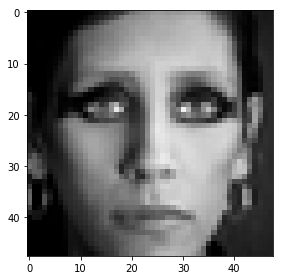

In [32]:
print(df_train.shape)
print(df_test.shape)

print(X_train.shape)

#afbeelding tonen

imshow(X_train[4].reshape((48,48)),cmap='gray')

In [13]:
#aanmaken en trainen van het model

# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 32 # 
epochs = 100 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 7
img_rows, img_cols = 48, 48
input_shape = (img_rows, img_cols, 1)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.3)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])

# Trainen van het CNN
history = model.fit(X_train, y_train,batch_size=batch_size, epochs=epochs, verbose=1)
print(history)



Epoch 1/100
28709/28709 [==============================] - 11s 390us/step - loss: 1.7792 - acc: 0.3044
Epoch 2/100
28709/28709 [==============================] - 9s 323us/step - loss: 1.5569 - acc: 0.3886
Epoch 3/100
28709/28709 [==============================] - 9s 323us/step - loss: 1.4725 - acc: 0.4262
Epoch 4/100
28709/28709 [==============================] - 9s 324us/step - loss: 1.4095 - acc: 0.4548
Epoch 5/100
28709/28709 [==============================] - 9s 325us/step - loss: 1.3604 - acc: 0.4748
Epoch 6/100
28709/28709 [==============================] - 9s 329us/step - loss: 1.3171 - acc: 0.4926
Epoch 7/100
28709/28709 [==============================] - 9s 327us/step - loss: 1.2758 - acc: 0.5081
Epoch 8/100
28709/28709 [==============================] - 9s 325us/step - loss: 1.2378 - acc: 0.5222
Epoch 9/100
28709/28709 [==============================] - 9s 325us/step - loss: 1.2119 - acc: 0.5347
Epoch 10/100
28709/28709 [==============================] - 9s 325us/step - loss:

In [ ]:
#grid search + meer epochs voor model optimalisatie (ik zal het niet doen want het duurt echt super lang om te trainen)

In [14]:
#testen op de testset

y_pred = model.predict_classes(X_test)
print('\n')
print('accuracy score:', accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)




accuracy score: 56.255224296461414


              precision    recall  f1-score   support

           0       0.48      0.45      0.46       491
           1       0.73      0.35      0.47        55
           2       0.45      0.34      0.39       528
           3       0.73      0.78      0.75       879
           4       0.41      0.44      0.43       594
           5       0.73      0.71      0.72       416
           6       0.50      0.58      0.53       626

   micro avg       0.56      0.56      0.56      3589
   macro avg       0.57      0.52      0.54      3589
weighted avg       0.56      0.56      0.56      3589

[[219   3  40  45  88  19  77]
 [ 15  19   6   5   4   2   4]
 [ 69   1 182  39 101  52  84]
 [ 33   1  39 682  54  15  55]
 [ 62   0  64  67 261  16 124]
 [ 17   1  41  27  13 296  21]
 [ 42   1  31  74 111   7 360]]


In [ ]:
#opmerkingen: Het netwerk lijkt de meeste moeite te hebben met klasse 5 (verdrietig :'( )
# maar het is eigenlijk niet goed, 50% op de testset is onaanvaardbaar! (oplossing: modeloptimalistatie met grid search)

In [23]:
#transferlearning (VGG19)

#images omzetten naar een driekleurenkanaal (VGG19 werkt niet met grayscale images)

df_train = dataset[dataset.Usage == "Training"]
df_test = dataset[dataset.Usage == "PrivateTest"]

X_train = df_train.iloc[:,0:2304].values
X_test = df_test.iloc[:,0:2304].values


X_train2 = []
X_test2 = []

for image in X_train:
    new_image = np.stack((image,)*3, -1)
    X_train2.append(new_image)
    

for image in X_test:
    new_image = np.stack((image,)*3, -1)
    X_test2.append(new_image)
    



# X_test = X_test.reshape((len(X_test),48,48,1))

#vraagje wat doet dit reshapen juist? Hoe zou ik de shape moeten lezen in woorden? 


y_train = df_train.emotion.values
y_train = np_utils.to_categorical(y_train)

y_test = df_test.emotion.values 


In [25]:
X_train2 = np.asarray(X_train2)
print(X_train2.shape)
X_train2 = X_train2.reshape((len(X_train2),48,48,3))
print(X_train2.shape)


X_test2 = np.asarray(X_test2)
X_test2 = X_test2.reshape((len(X_test2),48,48,3))

(28709, 2304, 3)
(28709, 48, 48, 3)


In [29]:
#normilastie

X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')
X_train2 /= 255
X_test2 /= 255

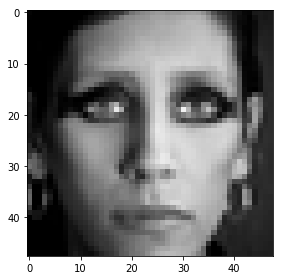

In [33]:
imshow(X_train2[4])

In [ ]:
#opmerkingen:

# 1) VGG19 werkt met images met 3 kleurkanalen, onze images zijn echter grijswaarden-afbeeldingen
# 2) dus moeten we onze grijswaarden-afbeeldingen omzetten naar images met 3 kanalen
# 3) ik gebruik hiervoor de functie np.stack waarmee ik de grijswaarden dupliceer in de kleurkanalen en dus eigenlijk een image
#bekom die bestaat uit shape(48,48,3) met in de 3 kleurkanalen de grijswaarden
# 4) deze nieuwe array kunnen we nu gebruiken om het model te trainen!

# 5) ik zou eigenlijk nog moeten preprocess doen van de data volgens VGG19 maar heb ik nu niet gedaan (wel genormaliseerd)

In [31]:
#transferlearning (VGG19)

#VGG netwerk ophalen, we nemen de top_layer (=classificatie layer niet mee want we trainen op andere klasses)


modelVGG19 = VGG19(weights='imagenet', include_top=False, input_shape=(48,48,3))

#sequential model aanmaken en de layers van het model er in plaatsen


model = Sequential()

for layer in modelVGG19.layers[:]:
    model.add(layer)

model.summary()

#layers op niet-trainable zetten

for layer in model.layers:
    layer.trainable = False

# Toevoegen van de output layer met softmax activatiefunctie
model.add(Flatten()) 
model.add(Dense(50,activation='softmax'))
model.add(Dense(7,activation='softmax'))

adam = keras.optimizers.adam()
model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)       295168    
__________

In [34]:
history = model.fit(X_train2, y_train,batch_size=32, epochs=50, verbose=1)

Epoch 1/50
28709/28709 [==============================] - 40s 1ms/step - loss: 1.5118 - acc: 0.4189
Epoch 2/50
28709/28709 [==============================] - 35s 1ms/step - loss: 1.5110 - acc: 0.4184
Epoch 3/50
28709/28709 [==============================] - 35s 1ms/step - loss: 1.5097 - acc: 0.4187
Epoch 4/50
28709/28709 [==============================] - 35s 1ms/step - loss: 1.5078 - acc: 0.4212
Epoch 5/50
28709/28709 [==============================] - 35s 1ms/step - loss: 1.5082 - acc: 0.4190
Epoch 6/50
28709/28709 [==============================] - 35s 1ms/step - loss: 1.5075 - acc: 0.4190
Epoch 7/50
28709/28709 [==============================] - 36s 1ms/step - loss: 1.5053 - acc: 0.4198
Epoch 8/50
28709/28709 [==============================] - 36s 1ms/step - loss: 1.5048 - acc: 0.4208
Epoch 9/50
28709/28709 [==============================] - 36s 1ms/step - loss: 1.5033 - acc: 0.4220
Epoch 10/50
28709/28709 [==============================] - 36s 1ms/step - loss: 1.5025 - acc: 0.4231

In [36]:
#voorspellen van de testset met het getrainde VGG19 model (enkel de toplayer werd getraind)

y_pred = model.predict_classes(X_test2)
print('\n')
print('accuracy score:', accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)



accuracy score: 40.51267762607969


              precision    recall  f1-score   support

           0       0.31      0.28      0.29       491
           1       0.00      0.00      0.00        55
           2       0.27      0.16      0.20       528
           3       0.47      0.64      0.54       879
           4       0.34      0.33      0.34       594
           5       0.51      0.58      0.54       416
           6       0.38      0.38      0.38       626

   micro avg       0.41      0.41      0.41      3589
   macro avg       0.33      0.34      0.33      3589
weighted avg       0.38      0.41      0.39      3589

[[137   0  44 128  83  26  73]
 [ 22   0   8  15   4   2   4]
 [ 59   0  84 120  97 103  65]
 [ 60   0  39 562  82  40  96]
 [ 62   0  71 141 196  21 103]
 [ 37   0  34  50  19 240  36]
 [ 62   0  28 168  95  38 235]]


c:\users\vanbe\appdata\local\programs\python\python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
#conclusies: 

#ik denk dat het model wel nog wat meer accuracy kan halen met wat meer epochs maar het zal nooit denderend zijn
#dit komt omdat het netwerk model eigenlijk getraind werd kleurimages, maar wij grijsimages hebben erin gedaan

#vreemd: heeft niks bij klasse 2 geplaatst? toevallig? 


## Car detection system

De uiteindelijke bedoeling is om een werkende car detector te bouwen die in staat is om in een afbeelding (of video) auto's met een hoge accuraatheid te detecteren en er een bounding box omheen te tekenen, zoals op onderstaand voorbeeld.

![alt text](./JupyterImages/cardetectionExample.png "Title")

De opdracht kan in drie stukken opgedeeld worden:
1. Trainen van een CNN voor het classificeren van auto's. 
2. Detectie van de auto's in een afbeelding door met een in grootte variërend window de afbeelding af te scannen en elke subafbeelding door de in stap 1 getrainde classifiër te sturen.
3. Gebruik maken van YOLO.


### Stap 1. Car classifier

De map "vehicles" bevat duizenden kleurafbeeldingen van auto's, de map "non-vehicles" van niet-auto's.

- Maak van deze afbeeldingen gebruik om een accurate binaire CNN classifier (auto of niet-auto) te trainen. Bepaal daarbij zelf de architectuur, hyperparamters, grootte van test- en training set.

- Hertrain het VGG19 net als car detector. Vergelijk de accuracy met de accuracy van het eigen ontworpen CNN.

**Opmerkingen:**

- Omwille van het groot aantal afbeeldingen is het inladen ervan vrij geheugenintensief. Daarom is het aan te raden maar een deel van de afbeeldingen te gebruiken. Achteraf kan je de dataset uitbreiden als jouw computer dat toelaat.
- Normaliseer de afbeeldingen naar floats tussen 0 en 1.

```Python
X_car = X_car.astype('float32')`
X_car /= 255```





In [2]:
#uitwerken van de carclassifier

#ik zal de data ophalen met flow_from_directory


#aanmaken van het eigen model


num_classes = 2
img_rows, img_cols = 64, 64
input_shape = (img_rows, img_cols, 3)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
model.add(Conv2D(128, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
model.add(BatchNormalization())
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.2)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
#opmerking: ik had hier beter sigmoid gebruikt want binaire classificatie
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])




In [3]:
#flow data form directory (heb nieuwe mappen aangemaakt in mijn directory)
#een map train_data & test_data met daarin een map vehicles & non-vehicles met daarin desbetreffende fotos
#ik nam ongeveer 1000 fotos voor de test
#ik zou ze eigenlijk wel nog wat beter kunnen verdelen (beetje meer testdata)
from keras.preprocessing.image import ImageDataGenerator
 
train_data_dir = "train_data"

test_data_dir = "test_data"


train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

    
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(64, 64),batch_size=32,class_mode='categorical')

test_generator =  train_datagen.flow_from_directory(test_data_dir,target_size=(64, 64),batch_size=32,class_mode='categorical')

Found 15553 images belonging to 2 classes.
Found 2207 images belonging to 2 classes.


In [4]:
#trainen van het model (heb maar 10 epochs genomen omdat hij toch zeer snel aan 99% graakte)

#de 486 is het aantal batches dat hij gedaan heeft (15553/32)

history = model.fit_generator(
    train_generator,
    nb_epoch=10,
    samples_per_epoch=15553,
    validation_data=train_generator,
    nb_val_samples=58, workers=1)

c:\users\vanbe\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
c:\users\vanbe\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., workers=1, steps_per_epoch=486, epochs=10, validation_steps=58)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
486/486 [==============================] - 34s 69ms/step - loss: 0.4391 - acc: 0.9229 - val_loss: 2.2698 - val_acc: 0.8114
Epoch 2/10
486/486 [==============================] - 21s 43ms/step - loss: 0.1121 - acc: 0.9718 - val_loss: 0.2749 - val_acc: 0.9230
Epoch 3/10
486/486 [==============================] - 21s 43ms/step - loss: 0.0519 - acc: 0.9835 - val_loss: 0.2794 - val_acc: 0.9607
Epoch 4/10
486/486 [==============================] - 21s 43ms/step - loss: 0.0417 - acc: 0.9875 - val_loss: 0.0281 - val_acc: 0.9898
Epoch 5/10
486/486 [==============================] - 21s 43ms/step - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0772 - val_acc: 0.9720
Epoch 6/10
486/486 [==============================] - 21s 43ms/step - loss: 0.0322 - acc: 0.9900 - val_loss: 0.0203 - val_acc: 0.9946
Epoch 7/10
486/486 [==============================] - 21s 43ms/step - loss: 0.0382 - acc: 0.9884 - val_loss: 0.0449 - val_acc: 0.9855
Epoch 8/10
486/486 [==============================] - 21s 43ms

In [45]:
#evalueren van het getrainde model (het eerste is de loss, het tweede de accuracy)

score = model.evaluate_generator(test_generator, 2207, workers=1)
print('accuracy: {0}'.format(score))

accuracy: [0.01775759169813794, 0.9963735780788151]


(64, 64, 3)


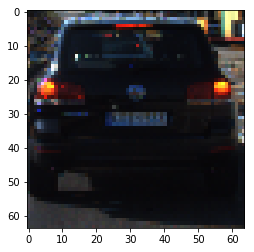

array([1], dtype=int64)

In [5]:
#voorspelling:
img = imread("train_data/vehicles/410.png")
print(img.shape)
imgplot = plt.imshow(img)
plt.show()

img = img.reshape(1,64,64,3)
model.predict_classes(img)

In [46]:
#VGG als carclassifier

modelVGG19 = VGG19(weights='imagenet', include_top=False, input_shape=(64,64,3))

#sequential model aanmaken en de layers van het model er in plaatsen


model = Sequential()

for layer in modelVGG19.layers[:]:
    model.add(layer)

model.summary()

#layers op niet-trainable zetten

for layer in model.layers:
    layer.trainable = False

# Toevoegen van de output layer met softmax activatiefunctie
model.add(Flatten()) 
model.add(Dense(50,activation='softmax'))
model.add(Dense(2,activation='softmax'))

adam = keras.optimizers.adam()
model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 16, 16, 256)       295168    
__________

In [47]:
#trainen van vgg19
history = model.fit_generator(
    train_generator,
    nb_epoch=10,
    samples_per_epoch=15553,
    validation_data=train_generator,
    nb_val_samples=58, workers=1)

c:\users\vanbe\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
c:\users\vanbe\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., workers=1, steps_per_epoch=486, epochs=10, validation_steps=58)`
  import sys


Epoch 1/10
486/486 [==============================] - 41s 84ms/step - loss: 0.3512 - acc: 0.9664 - val_loss: 0.2384 - val_acc: 0.9811
Epoch 2/10
486/486 [==============================] - 43s 89ms/step - loss: 0.1818 - acc: 0.9851 - val_loss: 0.1399 - val_acc: 0.9876
Epoch 3/10
486/486 [==============================] - 40s 83ms/step - loss: 0.1122 - acc: 0.9893 - val_loss: 0.0880 - val_acc: 0.9946
Epoch 4/10
486/486 [==============================] - 38s 79ms/step - loss: 0.0769 - acc: 0.9920 - val_loss: 0.0645 - val_acc: 0.9925
Epoch 5/10
486/486 [==============================] - 39s 81ms/step - loss: 0.0595 - acc: 0.9922 - val_loss: 0.0476 - val_acc: 0.9946
Epoch 6/10
486/486 [==============================] - 38s 77ms/step - loss: 0.0443 - acc: 0.9938 - val_loss: 0.0419 - val_acc: 0.9952
Epoch 7/10
486/486 [==============================] - 37s 77ms/step - loss: 0.0341 - acc: 0.9956 - val_loss: 0.0240 - val_acc: 0.9984
Epoch 8/10
486/486 [==============================] - 37s 77ms

In [48]:
#evalueren vgg19

score = model.evaluate_generator(test_generator, 2207, workers=1)
print('accuracy: {0}'.format(score))


accuracy: [0.021670309092417874, 0.99456036711189]


### Stap 2.  Sliding window detection

Scan de afbeelding van met een window dat in grootte varieert. Classificeer nu telkens de subafbeelding die zich onder het window bevindt. Teken een bounding box rond de gedetecteerde auto.
Gebruik als classifier ofwel het eigen CNN of de hertrainde VGG19 classifier.

In de map "StreetImages" zitten enkele afbeeldingen die je kan gebruiken om de detector op los te laten

Belangrijk is niet alleen te optimalizeren voor detectie accuraatheid maar ook naar **detectiesnelheid**.

Voor het tekenen van de bounding box kan volgende code gebruikt worden:
```python
def rectangle_perimeter(r0, c0, width, height, shape=None, clip=False):
    rr, cc = [r0, r0 + width, r0 + width, r0], [c0, c0, c0 + height, c0 + height]
    return skimage.draw.polygon_perimeter(rr, cc, shape=shape, clip=clip)

# tekenen van bounding box:
rr, cc = rectangle_perimeter(y, x, w, w)
image_detected[rr,cc] =255

```

Eenzelfde auto zal normaal gezien door meerdere boundingboxes aangeduid zijn. Zoek een manier om boundingboxes die heel dicht op elkaar liggen tot één enkele bounding box te herleiden.

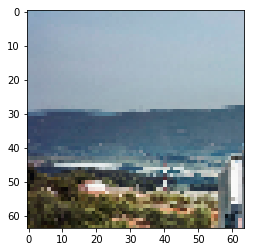

0


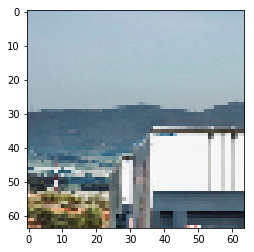

0


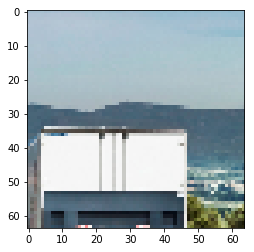

0


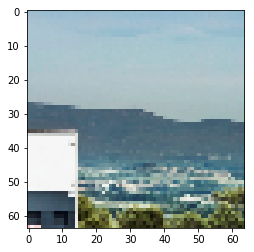

0


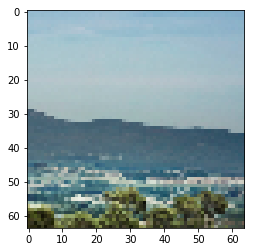

0


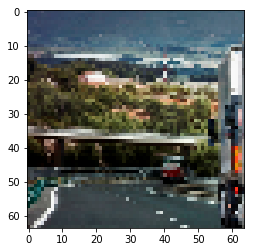

0


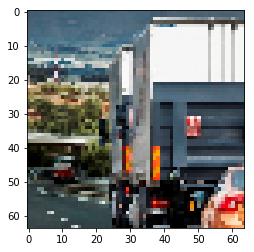

0


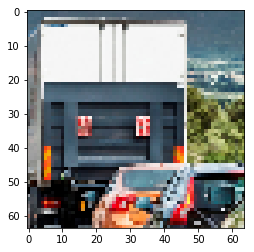

0


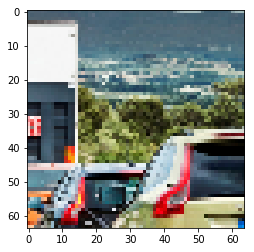

0


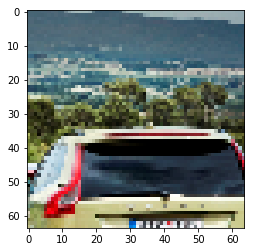

0


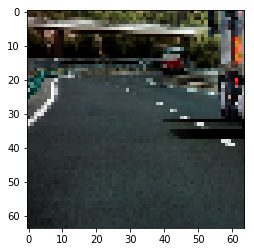

1
tekenen


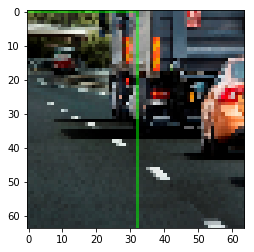

1
tekenen


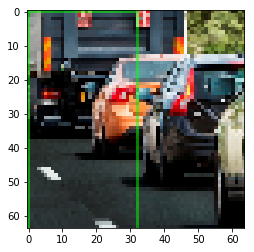

1
tekenen


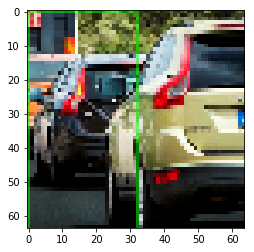

1
tekenen


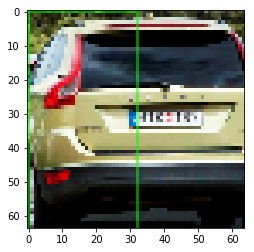

1
tekenen


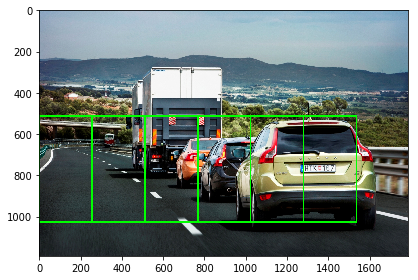

In [27]:
# Uitwerking sliding window detection (ik zal het doen met mijn zelfgemaakte model)

#vraagje: mijn netwerk heeft een afbeelding nodig van specifiek 64 x 64 x 3, dit kan ik natuurlijk niet meer veranderen? 
#dit betekent dat ik mijn afbeelding moet herschalen naar 64 x 64 x 3 om er een predictie op te doen? 
# dus ik neem een sliding window van bv 30 x 30, en daarna moet ik dit herschalen naar 64 x 64 om het te kunnen classificeren? 

img = imread("StreetImages/street4.jpg")
# imshow(img)
# print(img.shape)
# img = skimage.transform.resize(img, (64,64,3))
# print(img.shape)
# imshow(img)
# # x = image.img_to_array(img)
# x = np.expand_dims(img, axis=0)
# x = x.reshape((len(x),64,64,3))
# x = preprocess_input(x)

# print(x.shape)

import cv2 as cv

# def rectangle_perimeter(r0, c0, width, height, shape=None, clip=False):
#     rr, cc = [r0, r0 + width, r0 + width, r0], [c0, c0, c0 + height, c0 + height]
#     return skimage.draw.polygon_perimeter(rr, cc, shape=shape, clip=clip)



def sliding_window(image, stepSize, windowSize):
# slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1],x:x + windowSize[0]])
            
#           model.predict()




def test(afbeelding):
#     imshow(afbeelding)
    generator = sliding_window(afbeelding, 256, (512,512))
    for window in generator: 
        
        image_array = np.asarray(window[2])
        if(image_array.shape == (512,512,3)):            
                       
            img = skimage.transform.resize(image_array, (64,64,3))
            imgplot = plt.imshow(img)
            plt.show()
            img = img.reshape(1,64,64,3)            
            score = model.predict_classes(img)
            print(score[0])
            if(score[0] == 1):
                print("tekenen")
#                 rr, cc = rectangle_perimeter(window[1], window[0], 512, 512)
#                 abeelding = afbeelding[rr,cc] = 255
                afbeelding = cv.rectangle(afbeelding, (window[0],window[1]), (window[0]+512,window[1]+512), (0,255,0), 5)
                
            
            
        else:
            pass
    return afbeelding
        
afbeelding = test(img)
afbeelding.shape
imshow(afbeelding)


#het reshapen van de image zorgt voor klote kwaliteit, is het hierdoor dat het model eigenlijk zo veel verkeerd predict? 
# model.predict(x)


In [ ]:
#opmerkingen:

#had niet veel geen tijd meer, maar dus zou ik eigenlijk nog de afbeelding moeten afscannen met een groter worden window,
#zodat de auto perfect in het midden van het vak staat, ook classificeerde hij het hele linkse vak als auto maar dat was het niet,
#denk dat het oa. te maken heeft met het resizen van de windows 512 -> 64 wat de kwaliteit verprustst

#vraag: kan ik dit anders aanpakken? Ik persoonlijk denk van niet aangezien het netwerk een specifieke input verreist & resizen
# de enige mogelijke oplossing is (en dus kwaliteitsverlies)

### Stap 3. Testen van YOLO

YOLO staat voor "You Only Look Once" en wordt aanzien als een van de meest performante objectdetectie systemen.
Zoek uit hoe YOLO werkt en probeer het te testen met de afbeeldingen uit de map 'StreetImages'. Het kan zijn dat Yolo niet werkt binnen de Jupyter omgeving zodat dat je genoodzaakt bent een apart Python script te gebruiken.

Meer info over Yolo is te vinden op https://pjreddie.com/darknet/yolo/ en https://github.com/experiencor/keras-yolo2

In [22]:
# Uitwerking Yolo

#vooraf moet je eerst de weights van YOLO downloaden 

LABELS = ['vehicle']

IMAGE_H, IMAGE_W = 416, 416
GRID_H,  GRID_W  = 13 , 13
BOX              = 5
CLASS            = len(LABELS)
CLASS_WEIGHTS    = np.ones(CLASS, dtype='float32')
OBJ_THRESHOLD    = 0.3
NMS_THRESHOLD    = 0.3
ANCHORS          = [0.57273, 0.677385, 1.87446, 2.06253, 3.33843, 5.47434, 7.88282, 3.52778, 9.77052, 9.16828]

NO_OBJECT_SCALE  = 1.0
OBJECT_SCALE     = 5.0
COORD_SCALE      = 1.0
CLASS_SCALE      = 1.0

BATCH_SIZE       = 16
WARM_UP_BATCHES  = 100
TRUE_BOX_BUFFER  = 50


In [23]:
#pad naar de weights
wt_path = 'yolo.weights'


In [27]:
#image generators aanmaken 

from keras.preprocessing.image import ImageDataGenerator


train_data_dir = "train_data"

test_data_dir = "test_data"


train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

    
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(416, 416),batch_size=32,class_mode='categorical')

test_generator =  train_datagen.flow_from_directory(test_data_dir,target_size=(416, 416),batch_size=32,class_mode='categorical')

Found 15553 images belonging to 2 classes.
Found 2207 images belonging to 2 classes.


In [25]:
#aanmaken van het model

from keras.layers import Input, Lambda, Reshape
from keras.models import Sequential, Model

from keras.layers.advanced_activations import LeakyReLU
import tensorflow as tf
from keras.layers.merge import concatenate



# the function to implement the orgnization layer (thanks to github.com/allanzelener/YAD2K)
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

input_image = Input(shape=(IMAGE_H, IMAGE_W, 3))
true_boxes  = Input(shape=(1, 1, 1, TRUE_BOX_BUFFER , 4))

# Layer 1
x = Conv2D(32, (3,3), strides=(1,1), padding='same', name='conv_1', use_bias=False)(input_image)
x = BatchNormalization(name='norm_1')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 2
x = Conv2D(64, (3,3), strides=(1,1), padding='same', name='conv_2', use_bias=False)(x)
x = BatchNormalization(name='norm_2')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 3
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_3', use_bias=False)(x)
x = BatchNormalization(name='norm_3')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 4
x = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_4', use_bias=False)(x)
x = BatchNormalization(name='norm_4')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 5
x = Conv2D(128, (3,3), strides=(1,1), padding='same', name='conv_5', use_bias=False)(x)
x = BatchNormalization(name='norm_5')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 6
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_6', use_bias=False)(x)
x = BatchNormalization(name='norm_6')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 7
x = Conv2D(128, (1,1), strides=(1,1), padding='same', name='conv_7', use_bias=False)(x)
x = BatchNormalization(name='norm_7')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 8
x = Conv2D(256, (3,3), strides=(1,1), padding='same', name='conv_8', use_bias=False, input_shape=(416,416,3))(x)
x = BatchNormalization(name='norm_8')(x)
x = LeakyReLU(alpha=0.1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 9
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_9', use_bias=False)(x)
x = BatchNormalization(name='norm_9')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 10
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_10', use_bias=False)(x)
x = BatchNormalization(name='norm_10')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 11
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_11', use_bias=False)(x)
x = BatchNormalization(name='norm_11')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 12
x = Conv2D(256, (1,1), strides=(1,1), padding='same', name='conv_12', use_bias=False)(x)
x = BatchNormalization(name='norm_12')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 13
x = Conv2D(512, (3,3), strides=(1,1), padding='same', name='conv_13', use_bias=False)(x)
x = BatchNormalization(name='norm_13')(x)
x = LeakyReLU(alpha=0.1)(x)

skip_connection = x

x = MaxPooling2D(pool_size=(2, 2))(x)

# Layer 14
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_14', use_bias=False)(x)
x = BatchNormalization(name='norm_14')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 15
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_15', use_bias=False)(x)
x = BatchNormalization(name='norm_15')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 16
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_16', use_bias=False)(x)
x = BatchNormalization(name='norm_16')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 17
x = Conv2D(512, (1,1), strides=(1,1), padding='same', name='conv_17', use_bias=False)(x)
x = BatchNormalization(name='norm_17')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 18
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_18', use_bias=False)(x)
x = BatchNormalization(name='norm_18')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 19
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_19', use_bias=False)(x)
x = BatchNormalization(name='norm_19')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 20
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_20', use_bias=False)(x)
x = BatchNormalization(name='norm_20')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 21
skip_connection = Conv2D(64, (1,1), strides=(1,1), padding='same', name='conv_21', use_bias=False)(skip_connection)
skip_connection = BatchNormalization(name='norm_21')(skip_connection)
skip_connection = LeakyReLU(alpha=0.1)(skip_connection)
skip_connection = Lambda(space_to_depth_x2)(skip_connection)

x = concatenate([skip_connection, x])

# Layer 22
x = Conv2D(1024, (3,3), strides=(1,1), padding='same', name='conv_22', use_bias=False)(x)
x = BatchNormalization(name='norm_22')(x)
x = LeakyReLU(alpha=0.1)(x)

# Layer 23
x = Conv2D(BOX * (4 + 1 + CLASS), (1,1), strides=(1,1), padding='same', name='conv_23')(x)
output = Reshape((GRID_H, GRID_W, BOX, 4 + 1 + CLASS))(x)

# small hack to allow true_boxes to be registered when Keras build the model 
# for more information: https://github.com/fchollet/keras/issues/2790
output = Lambda(lambda args: args[0])([output, true_boxes])

model = Model([input_image, true_boxes], output)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 416, 416, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
norm_1 (BatchNormalization)     (None, 416, 416, 32) 128         conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_45 (LeakyReLU)      (None, 416, 416, 32) 0           norm_1[0][0]                     
__________________________________________________________________________________________________
max_poolin

In [12]:
#gedownloade weights inladen
import utils
from utils import WeightReader, decode_netout, draw_boxes

weight_reader = utils.WeightReader(wt_path)

weight_reader.reset()
nb_conv = 23

for i in range(1, nb_conv+1):
    conv_layer = model.get_layer('conv_' + str(i))
    
    if i < nb_conv:
        norm_layer = model.get_layer('norm_' + str(i))
        
        size = np.prod(norm_layer.get_weights()[0].shape)

        beta  = weight_reader.read_bytes(size)
        gamma = weight_reader.read_bytes(size)
        mean  = weight_reader.read_bytes(size)
        var   = weight_reader.read_bytes(size)

        weights = norm_layer.set_weights([gamma, beta, mean, var])       
        
    if len(conv_layer.get_weights()) > 1:
        bias   = weight_reader.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
        kernel = weight_reader.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
        kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
        kernel = kernel.transpose([2,3,1,0])
        conv_layer.set_weights([kernel, bias])
    else:
        kernel = weight_reader.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
        kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
        kernel = kernel.transpose([2,3,1,0])
        conv_layer.set_weights([kernel])


In [26]:
#custom los functie
def custom_loss(y_true, y_pred):
    mask_shape = tf.shape(y_true)[:4]
    
    cell_x = tf.to_float(tf.reshape(tf.tile(tf.range(GRID_W), [GRID_H]), (1, GRID_H, GRID_W, 1, 1)))
    cell_y = tf.transpose(cell_x, (0,2,1,3,4))

    cell_grid = tf.tile(tf.concat([cell_x,cell_y], -1), [BATCH_SIZE, 1, 1, 5, 1])
    
    coord_mask = tf.zeros(mask_shape)
    conf_mask  = tf.zeros(mask_shape)
    class_mask = tf.zeros(mask_shape)
    
    seen = tf.Variable(0.)
    total_recall = tf.Variable(0.)
    
    """
    Adjust prediction
    """
    ### adjust x and y      
    pred_box_xy = tf.sigmoid(y_pred[..., :2]) + cell_grid
    
    ### adjust w and h
    pred_box_wh = tf.exp(y_pred[..., 2:4]) * np.reshape(ANCHORS, [1,1,1,BOX,2])
    
    ### adjust confidence
    pred_box_conf = tf.sigmoid(y_pred[..., 4])
    
    ### adjust class probabilities
    pred_box_class = y_pred[..., 5:]
    
    """
    Adjust ground truth
    """
    ### adjust x and y
    true_box_xy = y_true[..., 0:2] # relative position to the containing cell
    
    ### adjust w and h
    true_box_wh = y_true[..., 2:4] # number of cells accross, horizontally and vertically
    
    ### adjust confidence
    true_wh_half = true_box_wh / 2.
    true_mins    = true_box_xy - true_wh_half
    true_maxes   = true_box_xy + true_wh_half
    
    pred_wh_half = pred_box_wh / 2.
    pred_mins    = pred_box_xy - pred_wh_half
    pred_maxes   = pred_box_xy + pred_wh_half       
    
    intersect_mins  = tf.maximum(pred_mins,  true_mins)
    intersect_maxes = tf.minimum(pred_maxes, true_maxes)
    intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
    
    true_areas = true_box_wh[..., 0] * true_box_wh[..., 1]
    pred_areas = pred_box_wh[..., 0] * pred_box_wh[..., 1]

    union_areas = pred_areas + true_areas - intersect_areas
    iou_scores  = tf.truediv(intersect_areas, union_areas)
    
    true_box_conf = iou_scores * y_true[..., 4]
    
    ### adjust class probabilities
    true_box_class = tf.argmax(y_true[..., 5:], -1)
    
    """
    Determine the masks
    """
    ### coordinate mask: simply the position of the ground truth boxes (the predictors)
    coord_mask = tf.expand_dims(y_true[..., 4], axis=-1) * COORD_SCALE
    
    ### confidence mask: penelize predictors + penalize boxes with low IOU
    # penalize the confidence of the boxes, which have IOU with some ground truth box < 0.6
    true_xy = true_boxes[..., 0:2]
    true_wh = true_boxes[..., 2:4]
    
    true_wh_half = true_wh / 2.
    true_mins    = true_xy - true_wh_half
    true_maxes   = true_xy + true_wh_half
    
    pred_xy = tf.expand_dims(pred_box_xy, 4)
    pred_wh = tf.expand_dims(pred_box_wh, 4)
    
    pred_wh_half = pred_wh / 2.
    pred_mins    = pred_xy - pred_wh_half
    pred_maxes   = pred_xy + pred_wh_half    
    
    intersect_mins  = tf.maximum(pred_mins,  true_mins)
    intersect_maxes = tf.minimum(pred_maxes, true_maxes)
    intersect_wh    = tf.maximum(intersect_maxes - intersect_mins, 0.)
    intersect_areas = intersect_wh[..., 0] * intersect_wh[..., 1]
    
    true_areas = true_wh[..., 0] * true_wh[..., 1]
    pred_areas = pred_wh[..., 0] * pred_wh[..., 1]

    union_areas = pred_areas + true_areas - intersect_areas
    iou_scores  = tf.truediv(intersect_areas, union_areas)

    best_ious = tf.reduce_max(iou_scores, axis=4)
    conf_mask = conf_mask + tf.to_float(best_ious < 0.6) * (1 - y_true[..., 4]) * NO_OBJECT_SCALE
    
    # penalize the confidence of the boxes, which are reponsible for corresponding ground truth box
    conf_mask = conf_mask + y_true[..., 4] * OBJECT_SCALE
    
    ### class mask: simply the position of the ground truth boxes (the predictors)
    class_mask = y_true[..., 4] * tf.gather(CLASS_WEIGHTS, true_box_class) * CLASS_SCALE       
    
    """
    Warm-up training
    """
    no_boxes_mask = tf.to_float(coord_mask < COORD_SCALE/2.)
    seen = tf.assign_add(seen, 1.)
    
    true_box_xy, true_box_wh, coord_mask = tf.cond(tf.less(seen, WARM_UP_BATCHES), 
                          lambda: [true_box_xy + (0.5 + cell_grid) * no_boxes_mask, 
                                   true_box_wh + tf.ones_like(true_box_wh) * np.reshape(ANCHORS, [1,1,1,BOX,2]) * no_boxes_mask, 
                                   tf.ones_like(coord_mask)],
                          lambda: [true_box_xy, 
                                   true_box_wh,
                                   coord_mask])
    
    """
    Finalize the loss
    """
    nb_coord_box = tf.reduce_sum(tf.to_float(coord_mask > 0.0))
    nb_conf_box  = tf.reduce_sum(tf.to_float(conf_mask  > 0.0))
    nb_class_box = tf.reduce_sum(tf.to_float(class_mask > 0.0))
    
    loss_xy    = tf.reduce_sum(tf.square(true_box_xy-pred_box_xy)     * coord_mask) / (nb_coord_box + 1e-6) / 2.
    loss_wh    = tf.reduce_sum(tf.square(true_box_wh-pred_box_wh)     * coord_mask) / (nb_coord_box + 1e-6) / 2.
    loss_conf  = tf.reduce_sum(tf.square(true_box_conf-pred_box_conf) * conf_mask)  / (nb_conf_box  + 1e-6) / 2.
    loss_class = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=true_box_class, logits=pred_box_class)
    loss_class = tf.reduce_sum(loss_class * class_mask) / (nb_class_box + 1e-6)
    
    loss = loss_xy + loss_wh + loss_conf + loss_class
    
    nb_true_box = tf.reduce_sum(y_true[..., 4])
    nb_pred_box = tf.reduce_sum(tf.to_float(true_box_conf > 0.5) * tf.to_float(pred_box_conf > 0.3))

    """
    Debugging code
    """    
    current_recall = nb_pred_box/(nb_true_box + 1e-6)
    total_recall = tf.assign_add(total_recall, current_recall) 

    loss = tf.Print(loss, [tf.zeros((1))], message='Dummy Line \t', summarize=1000)
    loss = tf.Print(loss, [loss_xy], message='Loss XY \t', summarize=1000)
    loss = tf.Print(loss, [loss_wh], message='Loss WH \t', summarize=1000)
    loss = tf.Print(loss, [loss_conf], message='Loss Conf \t', summarize=1000)
    loss = tf.Print(loss, [loss_class], message='Loss Class \t', summarize=1000)
    loss = tf.Print(loss, [loss], message='Total Loss \t', summarize=1000)
    loss = tf.Print(loss, [current_recall], message='Current Recall \t', summarize=1000)
    loss = tf.Print(loss, [total_recall/seen], message='Average Recall \t', summarize=1000)
    
    return loss

In [28]:
optimizer = keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss=custom_loss, optimizer=optimizer)

model.fit_generator(generator        = train_generator, 
                    steps_per_epoch  = len(train_generator), 
                    epochs           = 100, 
                    verbose          = 1,
                    validation_data  = test_generator,
                    validation_steps = len(test_generator),
                    max_queue_size   = 3)

Epoch 1/100


ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 2 array(s), but instead got the following list of 1 arrays: [array([[[[0.18431373, 0.20000002, 0.26666668],
         [0.18431373, 0.20000002, 0.26666668],
         [0.18431373, 0.20000002, 0.26666668],
         ...,
         [0.10588236, 0.09019608, 0.07450981...